# COURSE: A deep understanding of deep learning
## SECTION: ANNs
### LECTURE: ANN for regression
#### TEACHER: Mike X Cohen, sincxpress.com
##### COURSE URL: udemy.com/course/dudl/?couponCode=202108

In [1]:
# import libraries
import torch
import torch.nn as nn
import numpy as np
import torch.nn
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

<ipython-input-1-47e3bcc2019c>:7: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


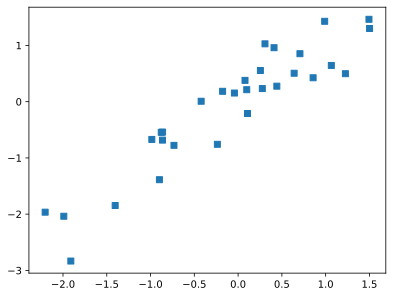

In [2]:
# create data

N = 30
x = torch.randn(N,1)
y = x + torch.randn(N,1)/2

# and plot
plt.plot(x,y,'s')
plt.show()

In [5]:
def createANNmodel(learningRate):

  # model architecture
  ANNclassify = nn.Sequential(
      nn.Linear(2,16),   # input layer
      nn.ReLU(),        # activation unit
      nn.Linear(12,4),   # output unit
      nn.ReLU(),
      nn.Linear(4,2),
      nn.ReLU(),
      nn.Linear(20,1)
      #nn.Sigmoid(),    # final activation unit (not needed b/c we use BCEWithLogitsLoss)
        )

  # loss function
  lossfun = nn.BCEWithLogitsLoss()

  # optimizer
  optimizer = torch.optim.SGD(ANNclassify.parameters(),lr=learningRate)

  # model output
  return ANNclassify,lossfun,optimizer

In [163]:
torch.random.manual_seed(15)
ran_net1,_,_2 = createANNmodel(0.1)
ran_net2,_,_2 = createANNmodel(0.1)
ran_net3,_,_2 = createANNmodel(0.1)
ran_net4,_,_2 = createANNmodel(0.1)
ran_net3.named_parameters()
nets = [ran_net3,ran_net1 ]
real = np.array([])
li = []

for net in nets:
  ne_tm= np.array([])
  for p in net.named_parameters():
    torch.random.manual_seed(15)
    if p[0].rsplit('.')[-1] == 'weight':
      w = torch.empty(p[1].data.size())
      p[1].data = nn.init.xavier_uniform(w,gain = nn.init.calculate_gain('relu'))
      ne_tm = np.concatenate((ne_tm,p[1].data.reshape(-1).numpy()) )



  li.append(ne_tm)

# print(ran_net3[6].weight.data)
li

<ipython-input-163-5a59f02b686f>:17: FutureWarning: `nn.init.xavier_uniform` is now deprecated in favor of `nn.init.xavier_uniform_`.
  p[1].data = nn.init.xavier_uniform(w,gain = nn.init.calculate_gain('relu'))


[array([-0.33095968, -0.36481819,  0.48558092, -0.18472539,  0.6809321 ,
        -0.1428894 ,  0.08792412,  0.10551578,  0.00430518, -0.45631933,
         0.29403475, -0.18293279, -0.30170897,  0.01357663,  0.72739327,
        -0.32524997,  0.17271866, -0.32681566,  0.77427703, -0.25811434,
         0.67484158, -0.29580662,  0.19856171,  0.02679653,  0.40835178,
        -0.77405852,  0.20093656, -0.78731394,  0.18346258, -0.60091704,
         0.65474749, -0.18405788, -0.35103571, -0.38694808,  0.51503634,
        -0.19593085,  0.72223753, -0.15155709,  0.09325761,  0.11191638,
         0.00456633, -0.4839997 ,  0.31187093, -0.19402951, -0.32001066,
         0.01440019,  0.77151704, -0.34497967,  0.1831958 , -0.34664035,
         0.82124478, -0.27377158,  0.71577758, -0.3137503 ,  0.21060649,
         0.02842201,  0.43312243, -0.82101297,  0.21312539, -0.83507252,
         0.19459145, -0.63736874,  0.69446456, -0.19522285,  0.54423642,
         0.37180468,  0.79126352, -0.33027142, -0.7

In [169]:
ne_tm1 = np.array([])
for p in net.named_parameters():
  torch.random.manual_seed(100000000)
  if p[0].rsplit('.')[-1] == 'weight':

    w = torch.empty(p[1].data.size())
    p[1].data = nn.init.xavier_normal(w)
    ne_tm1 = np.concatenate((ne_tm1,p[1].data.reshape(-1).numpy()) )
# print(ran_net2[4].weight)


<ipython-input-169-d2e28ad3a476>:7: FutureWarning: `nn.init.xavier_normal` is now deprecated in favor of `nn.init.xavier_normal_`.
  p[1].data = nn.init.xavier_normal(w)


In [170]:
ne_tm2 = np.array([])
for p in ran_net4.named_parameters():
  if p[0].rsplit('.')[-1] == 'weight':
    ne_tm2 = np.concatenate((ne_tm2,p[1].data.reshape(-1).numpy()) )

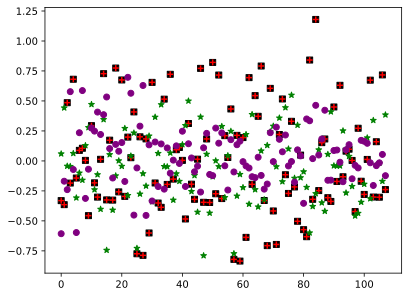

In [171]:
plt.scatter(range(len(li[0])),li[0],c = 'black',marker = 's')
plt.scatter(range(len(li[1])),li[0],c = 'red',marker = '+')
plt.scatter(range(len(ne_tm1)),ne_tm1,c = 'green',marker = '*')
plt.scatter(range(len(ne_tm2)),ne_tm2,c = 'purple',marker = 'o')

In [ ]:
# train the model
numepochs = 500
losses = torch.zeros(numepochs)


## Train the model!
for epochi in range(numepochs):

  # forward pass
  yHat = ANNreg(x)

  # compute loss
  loss = lossfun(yHat,y)
  losses[epochi] = loss

  # backprop
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

In [ ]:
# show the losses

# manually compute losses
# final forward pass
predictions = ANNreg(x)

# final loss (MSE)
testloss = (predictions-y).pow(2).mean()

plt.plot(losses.detach(),'o',markerfacecolor='w',linewidth=.1)
plt.plot(numepochs,testloss.detach(),'ro')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Final loss = %g' %testloss.item())
plt.show()

In [ ]:
testloss.item()

In [ ]:
# plot the data
plt.plot(x,y,'bo',label='Real data')
plt.plot(x,predictions.detach(),'rs',label='Predictions')
plt.title(f'prediction-data r={np.corrcoef(y.T,predictions.detach().T)[0,1]:.2f}')
plt.legend()
plt.show()

# Additional explorations

In [ ]:
# 1) How much data is "enough"? Try different values of N and see how low the loss gets.
#    Do you still get low loss ("low" is subjective, but let's say loss<.25) with N=10? N=5?
#
# 2) Does your conclusion above depend on the amount of noise in the data? Try changing the noise level
#    by changing the division ("/2") when creating y as x+randn.
#
# 3) Notice that the model doesn't always work well. Put the original code (that is, N=30 and /2 noise)
#    into a function or a for-loop and repeat the training 100 times (each time using a fresh model instance).
#    Then count the number of times the model had a loss>.25.